In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
np.set_printoptions(legacy='1.25')

import warnings
warnings.filterwarnings('ignore')

In [21]:
## https://www.kaggle.com/datasets/yasserh/titanic-dataset 
titatic_df = pd.read_csv("./titanic_train.csv")

In [3]:
titatic_df.shape

(891, 12)

In [22]:
titatic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titatic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Information about dataset. Some datasets has null values.
titatic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

In [8]:
titatic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


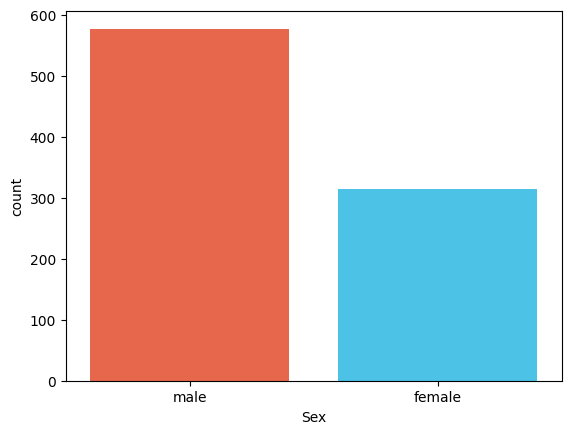

In [12]:
sns.countplot(x="Sex", data=titatic_df,palette=["#FF5733", "#33CFFF"])
plt.show()

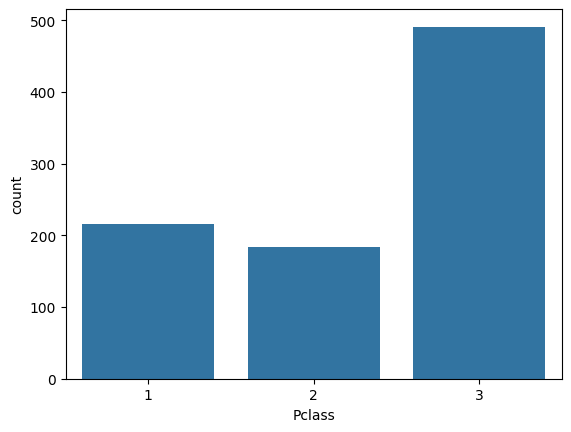

In [13]:
sns.countplot(x="Pclass", data=titatic_df)
plt.show()

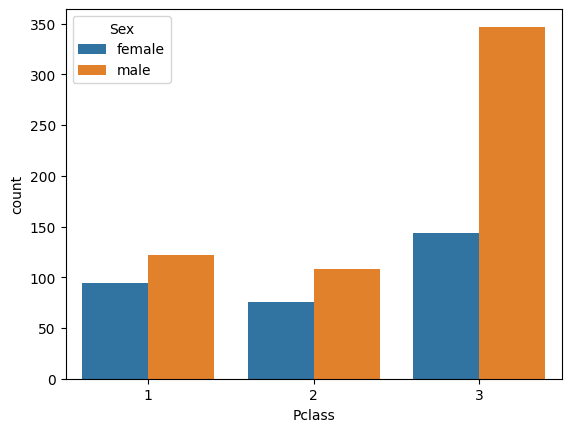

In [14]:
sns.countplot(x="Pclass", data=titatic_df, hue='Sex')
plt.show()

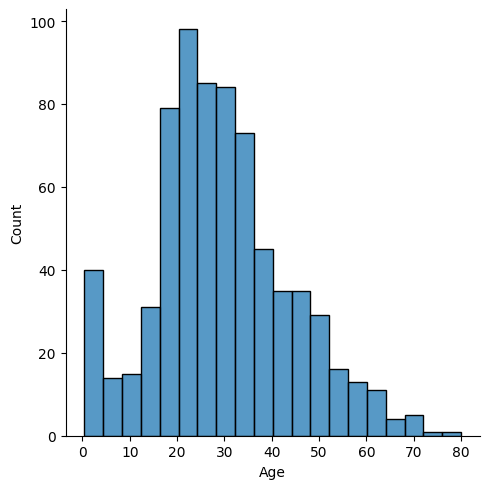

In [16]:
sns.displot(titatic_df['Age'], kde=False, bins=20)
plt.show()

In [23]:
titatic_df['Alone']=titatic_df['SibSp'] + titatic_df['Parch']

In [24]:
titatic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [25]:
titatic_df['Alone'].loc[titatic_df['Alone']>0] = 1

In [28]:
titatic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,0
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,0


## Factors to Survive

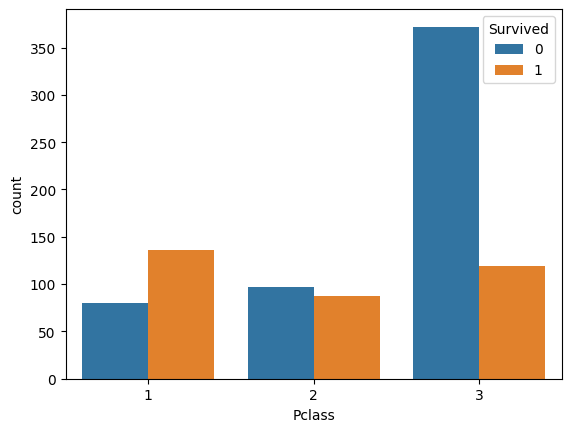

In [30]:
sns.countplot(x='Pclass', data=titatic_df, hue='Survived')
plt.show()

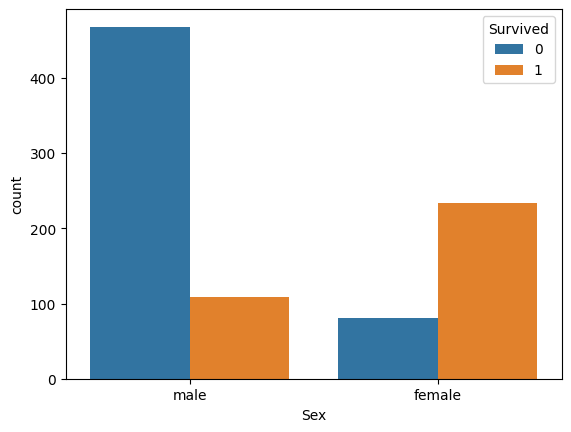

In [31]:
sns.countplot(x='Sex', data=titatic_df, hue='Survived')
plt.show()

## Data Preparation

In [32]:
titatic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [34]:
titatic_df = titatic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'])

In [35]:
titatic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Alone
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0
5,0,3,male,NaN,0,0,8.4583,0
6,0,1,male,54.0,0,0,51.8625,0
7,0,3,male,2.0,3,1,21.0750,1
8,1,3,female,27.0,0,2,11.1333,1
9,1,2,female,14.0,1,0,30.0708,1


In [38]:
titatic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Alone     891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [40]:
titatic_df['Sex'] = np.where(titatic_df['Sex'] =='male',1,0)

In [41]:
titatic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Alone
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0
5,0,3,1,NaN,0,0,8.4583,0
6,0,1,1,54.0,0,0,51.8625,0
7,0,3,1,2.0,3,1,21.0750,1
8,1,3,0,27.0,0,2,11.1333,1
9,1,2,0,14.0,1,0,30.0708,1


<Axes: >

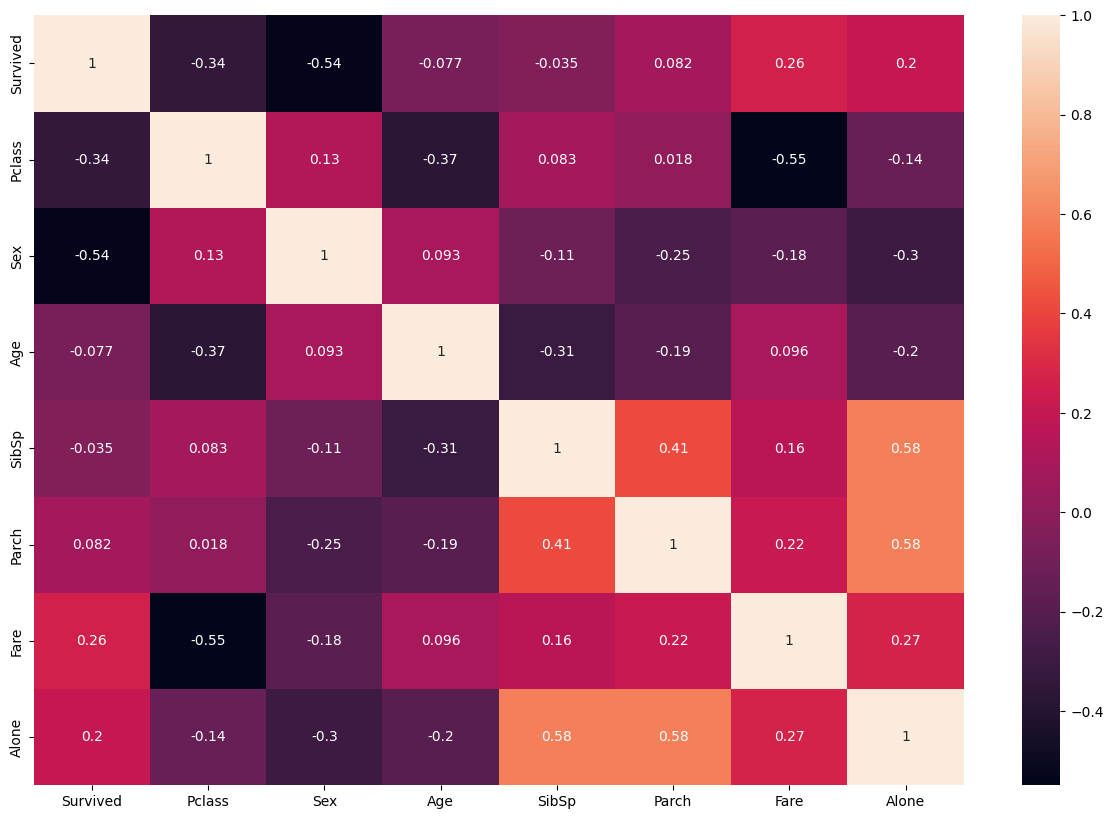

In [43]:
## Correlation map
plt.figure(figsize=(15,10))
sns.heatmap(titatic_df.corr(), annot=True)

## Handling of Missing Values

In [44]:
titatic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Alone         0
dtype: int64

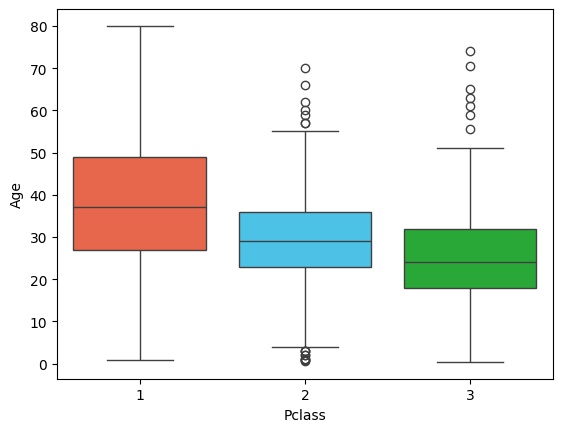

In [47]:
sns.boxplot(x='Pclass', y='Age', data=titatic_df,palette=["#FF5733", "#33CFFF","#15BD26"])
plt.show()

In [48]:
titatic_df['Age'].mean()

29.69911764705882

In [53]:
print(titatic_df[titatic_df['Pclass']==1]['Age'].mean())
print(titatic_df[titatic_df['Pclass']==2]['Age'].mean())
print(titatic_df[titatic_df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [59]:
def fill_age(row):
    age = row[0]
    pclass = row[1]

    if pd.isnull(age):
        if pclass==1:
            return 38.23
        elif pclass == 2:
            return 29.87
        else:
            return 25.14
    else:
        return age

    
   
 
    

In [61]:
titatic_df['Age'] = titatic_df[['Age','Pclass']].apply(fill_age, axis=1)

In [62]:
titatic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Alone       0
dtype: int64

In [63]:
titatic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Alone
0,0,3,1,22.00,1,0,7.2500,1
1,1,1,0,38.00,1,0,71.2833,1
2,1,3,0,26.00,0,0,7.9250,0
3,1,1,0,35.00,1,0,53.1000,1
4,0,3,1,35.00,0,0,8.0500,0
5,0,3,1,25.14,0,0,8.4583,0
6,0,1,1,54.00,0,0,51.8625,0
7,0,3,1,2.00,3,1,21.0750,1
8,1,3,0,27.00,0,2,11.1333,1
9,1,2,0,14.00,1,0,30.0708,1


## Decision Tree Model Building

In [67]:
X = titatic_df.drop(columns=['Survived'])
y = titatic_df['Survived']
print(X)
print("-------------------------------------------------------------------")
print(y)

     Pclass  Sex    Age  SibSp  Parch     Fare  Alone
0         3    1  22.00      1      0   7.2500      1
1         1    0  38.00      1      0  71.2833      1
2         3    0  26.00      0      0   7.9250      0
3         1    0  35.00      1      0  53.1000      1
4         3    1  35.00      0      0   8.0500      0
..      ...  ...    ...    ...    ...      ...    ...
886       2    1  27.00      0      0  13.0000      0
887       1    0  19.00      0      0  30.0000      0
888       3    0  25.14      1      2  23.4500      1
889       1    1  26.00      0      0  30.0000      0
890       3    1  32.00      0      0   7.7500      0

[891 rows x 7 columns]
-------------------------------------------------------------------
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  0.    , 25.14  , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  0.    ]])

In [70]:
X_train, X_test,y_train, y_test = train_test_split(X.values, y.values, test_size=0.20, random_state=42)

In [71]:
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [89]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [90]:
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [91]:
y_pred = model.predict(X_test)

In [92]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [93]:
model.score(X_train, y_train)

0.8342696629213483

In [95]:
model.score(X_test, y_test)

0.7988826815642458

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [98]:
f1_score(y_test, y_pred)

0.7391304347826086

## Visualization of Tree

In [101]:
features = X.columns

In [102]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Alone'], dtype='object')

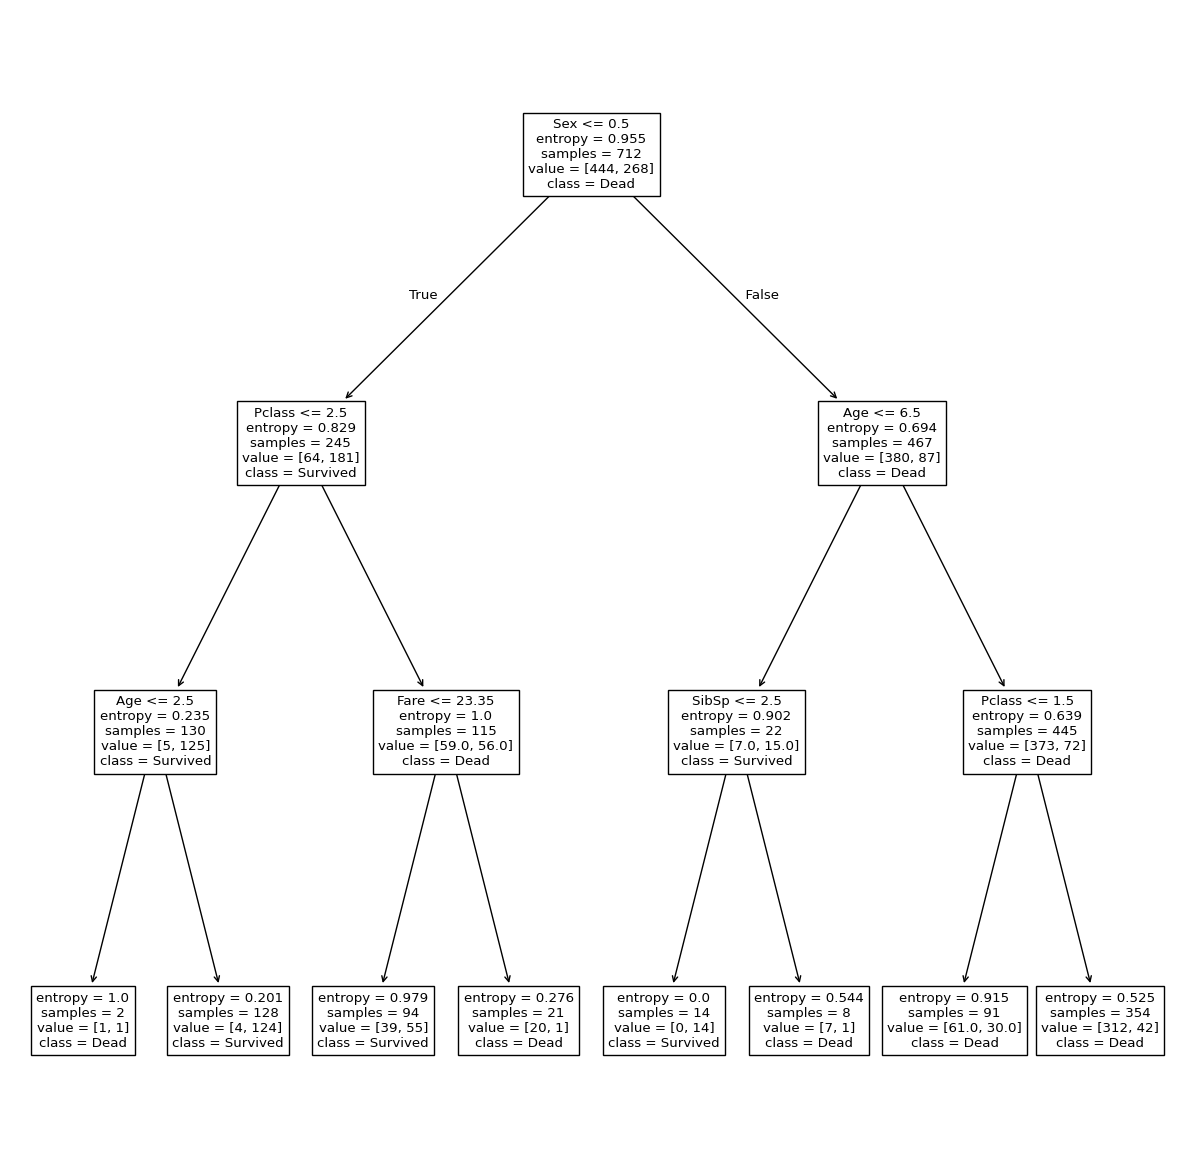

In [104]:
plt.figure(figsize=(15,15))
result = tree.plot_tree(model, feature_names=features, class_names=['Dead','Survived'])
plt.show()